In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_validate
from sklearn.metrics import f1_score, accuracy_score
from sklearn import preprocessing

      area  perimeter  compactness  kernel_length  kernel_width  asymmetry  \
50   14.43      14.40       0.8751          5.585         3.272      3.975   
177  10.74      12.73       0.8329          5.145         2.642      4.702   
141  13.32      13.94       0.8613          5.541         3.073      7.035   
145  11.21      13.13       0.8167          5.279         2.687      6.169   
178  11.48      13.05       0.8473          5.180         2.758      5.876   

     kernel_groove_length  
50                  5.144  
177                 4.963  
141                 5.440  
145                 5.275  
178                 5.002  


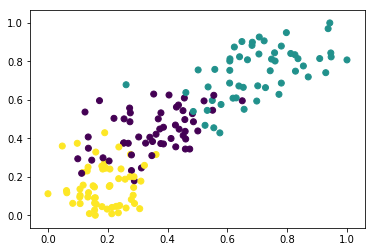

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994


In [2]:
df = pd.read_csv('seeds.csv')
y = df.Class
df = df.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.head())
def scale_dataset(dataset):
    scaler = preprocessing.MinMaxScaler()
    vals = dataset.values
    scaled_vals = scaler.fit_transform(vals)
    return pd.DataFrame(scaled_vals, columns = dataset.columns)
df = scale_dataset(df)
X_train = scale_dataset(X_train)
X_test = scale_dataset(X_test)
plt.scatter(X_train['kernel_length'], X_train['kernel_width'], c=y_train)
plt.show()
df.head()

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8809523809523809

## KFolds

In [49]:
folds = 10
neighbors = np.arange(1,11)
skf = StratifiedKFold(n_splits=folds)
f1_dict = {}
acc_dict = {}
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n, weights='uniform', metric='euclidean')
    scoring = {'acc': 'accuracy', 'f1': 'f1_macro'}
    fit = cross_validate(model, df, y, scoring=scoring, cv=skf, return_train_score=True)
    f1_dict[n] = (sum(fit['test_f1'])/folds)
    acc_dict[n] = (sum(fit['test_acc'])/folds)

max_index = 0
max_val = 0
for i in f1_dict.items():
    if i[1] > max_val:
        max_val = i[1]
        max_index = i[0]
print(f1_dict)
print('N:%s Val:%.3f' % (max_index, max_val))
# print('F1:', sum(fit['test_acc'])/folds)
# print('Acc:', sum(fit['test_f1'])/folds)

{1: 0.9135342435342437, 2: 0.8899337699337699, 3: 0.917081252081252, 4: 0.9277039627039629, 5: 0.912370684870685, 6: 0.9278504828504829, 7: 0.9179145854145855, 8: 0.9178779553779555, 9: 0.9177680652680653, 10: 0.9224902874902876}
N:6 Val:0.928


## Titanic

In [105]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
train['Sex'] = train['Sex'].map({'male':1, 'female':0}).astype(int)
test['Sex'] = test['Sex'].map({'male':1, 'female':0}).astype(int)
train = train.fillna(0)
test = test.fillna(0)
temp = train.values
scaler = preprocessing.MinMaxScaler()
train.head()
# temp_scaled = scaler.fit_transform(temp)
# train = pd.DataFrame(temp_scaled)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
